### Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import random

### Grab images

In [11]:
# plot the images
def display_image(img):
    imgplot = plt.imshow(img)
    plt.show()

def display_grayscale(img):
  plt.figure()
  plt.title('Input Image')
  plt.imshow(img, cmap='gray')

# helpful print functions
def print_array(name, arr):
  print("\n")
  print(f"======= {name} =======")
  print(arr, "\n")
  print(f"shape: {arr.shape}")
  print("\n")

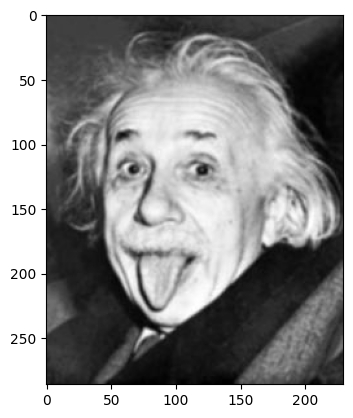

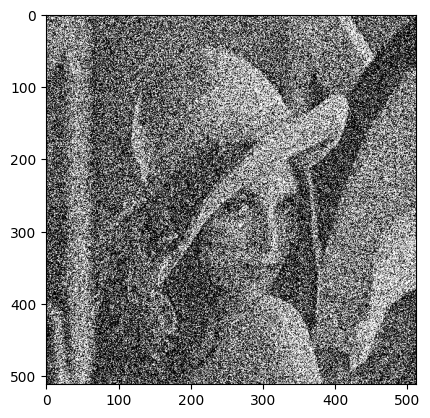

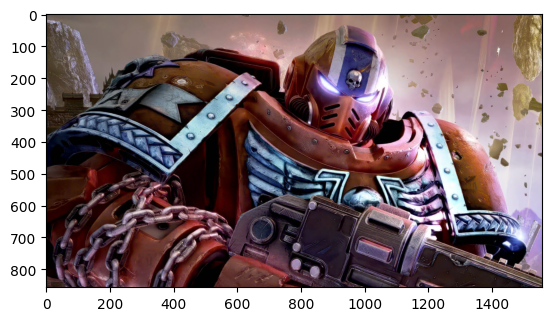

In [5]:
# the filepath (I will assume that all images are in the same directory as the code)
einstein_image_path = "./Einstein.jpeg"
lena_image_path = "./lenaNoise.png"
space_marine_path = "./space-marine.png"

einstein_img = cv2.imread(einstein_image_path)
lena_img = cv2.imread(lena_image_path)
space_marine_img = cv2.imread(space_marine_path)

# plot the images to make sure they are successfully loaded
display_image(einstein_img) # display einstein image
display_image(lena_img) # display the lena image
display_image(space_marine_img)

### Forward and Backward Difference

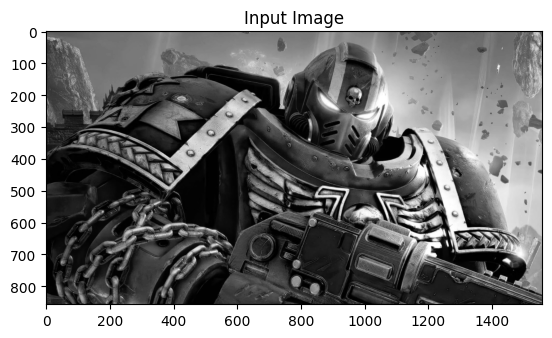

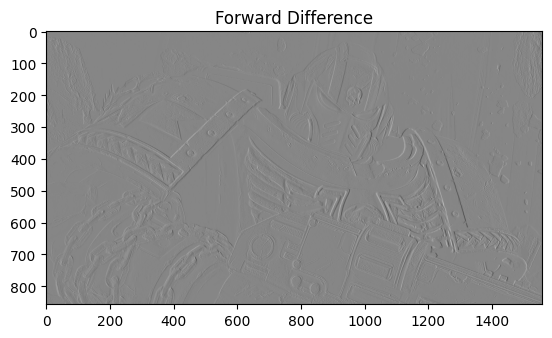

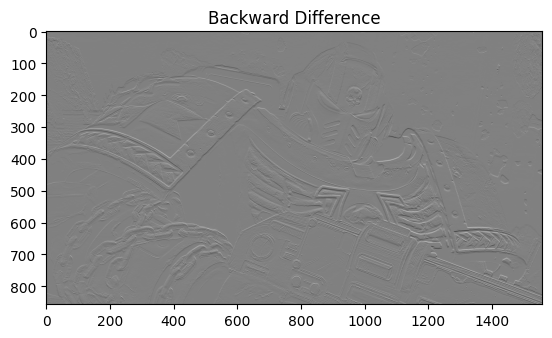

In [6]:
def forward_difference(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[:,1:cols-1] = image[:,1:cols-1] - image[:,0:cols-2];
    d[:,0] = image[:,0] - image[:,cols-1];
    return d


def backward_difference(image):
    rows, cols = image.shape
    d = np.zeros((rows,cols))
    d[1:rows-1, :] = image[1:rows-1, :] - image[0:rows-2, :];
    d[0,:] = image[0,:] - image[rows-1,:];
    return d


## replace with your own image
img = cv2.imread('space-marine.png')
img_gray = rgb2gray(img)


## plot the image
plt.figure()
plt.title('Input Image')
plt.imshow(img_gray, cmap='gray')


## calculate forward difference and plot
forward_diff_img = forward_difference(img_gray)
plt.figure()
plt.title('Forward Difference')
plt.imshow(forward_diff_img, cmap='gray')


## calculate backward difference and plot
backward_diff_img = backward_difference(img_gray)
plt.figure()
plt.title('Backward Difference')
plt.imshow(backward_diff_img, cmap='gray')

#### **Step 1: Generate noisy image**

In [8]:
"""
The function below makes the image noisy using gaussian additive noise.
@Parameters
  img: nd.array
    the numpy array representation of the image
  mean: int
    the mu for the guassian noise
  sigma: list(float)
    the list of sigmas to run for the gaussian image
  print_image: bool
    True if f images are to printed and False if f images are not to be printed
@Returns
  f_images: list(nd.array)
    list of the f images using all the values of sigma provided and the mean
"""
def generate_noisy_image(img, mean = 0, sigma = [1], print_image = False):
  # convert image to grayscale
  img_grayscale = rgb2gray(img)

  # grab the shape of the image
  img_shape = img_grayscale.shape
  f_images = []


  # create random noise
  for sigma_val in sigma:
    v_image = np.random.normal(loc = mean, scale = sigma_val, size = img_shape) # create noise
    f_image = np.add(img_grayscale, v_image) # add the noise
    f_images.append(f_image) # store to list


  # print the images
  if print_image:
    for f_image in f_images:
      display_grayscale(f_image)

  return f_images

# test noisy image generation
f_images = generate_noisy_image(img = einstein_img, mean = 0, sigma = [.001, .01, .1], print_image = False)

In [9]:
# testing or viewing purposes
print(f_images[0])

[[0.25285719 0.25073173 0.25094696 ... 0.22681708 0.21406129 0.20513743]
 [0.24917227 0.24769391 0.2515755  ... 0.22385819 0.21376466 0.20376379]
 [0.24634919 0.24759472 0.24793578 ... 0.21598049 0.20688367 0.19971418]
 ...
 [0.16232756 0.15748045 0.14939407 ... 0.16409013 0.17273883 0.17261612]
 [0.16014009 0.16461598 0.15419476 ... 0.14926415 0.15202769 0.15323934]
 [0.15402792 0.16052471 0.14435135 ... 0.14239976 0.14820828 0.15474847]]


#### **Step 2: Run Gradient Descent Denoising Algorithm**

In [14]:
"""
This function denoised the image using the gradient descent algorithm provided.
@Parameters
@Returns
"""
def gradient_descent(f_img, alpha = .01, iter = 10, lambda_val = .1):
  img_shape = f_img.shape

  u_image = np.random.rand(img_shape[0], img_shape[1])



  return None

gradient_descent(f_img = f_images[0])

#### **Step 3: Create convergence graph**